In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from autofeat import FeatureSelector, AutoFeatRegression

%matplotlib inline
%load_ext autoreload
%autoreload 2

## Feature Selection

In [2]:
# generate some toy data
np.random.seed(10)
x1 = np.random.rand(1000)
x2 = np.random.randn(1000)
x3 = np.random.rand(1000)
x4 = np.random.randn(1000)
x5 = np.random.rand(1000)
target = 2 + 15*x1 + 3/(x2 - 1/x3) + 5*(x2 + np.log(x1))**3
X = np.vstack([x1, x2, x3, x4, x5, 1/(x2 - 1/x3), (x2 + np.log(x1))**3]).T
fsel = FeatureSelector(verbose=1)
new_X = fsel.fit_transform(pd.DataFrame(X, columns=["x1", "x2", "x3", "x4", "x5", "eng6", "eng7"]), target)
# should contain ["x1", "eng6", "eng7"]
print(new_X.columns)

[featsel] Scaling data...done.
[featsel] 4/7 features after univariate filtering
[featsel] Feature selection run 1/3
[featsel] Feature selection run 2/3
[featsel] Feature selection run 3/3
[featsel] 3 features after 3 feature selection runs
[featsel] 3 features after correlation filtering
[featsel] 3 features after noise filtering
[featsel] 3 final features selected (including 0 original keep features).
Index(['x1', 'eng7', 'eng6'], dtype='object')


## AutoFeat

In [3]:
# generate some toy data
np.random.seed(10)
x1 = np.random.rand(1000)
x2 = np.random.randn(1000)
x3 = np.random.rand(1000)
target = 2 + 15*x1 + 3/(x2 - 1/x3) + 5*(x2 + np.log(x1))**3
target_noisy = target + 0.01*target.std()*np.random.randn(1000)
X = np.vstack([x1, x2, x3]).T
df_org = pd.DataFrame(X, columns=["x1", "x2", "x3"])

### Effect of number of feature engineering steps

### AutoFeat with 0 feateng_steps
[AutoFeatRegression] The 0 step feature engineering process could generate up to 3 features.
[AutoFeatRegression] With 1000 data points this new feature matrix would use about 0.00 gb of space.
[feateng] Warning: no features generated for max_steps < 1.
[featsel] Scaling data...done.
[featsel] 3/3 features after univariate filtering
[featsel] Feature selection run 1/3
[featsel] Feature selection run 2/3
[featsel] Feature selection run 3/3
[featsel] 3 features after 3 feature selection runs
[featsel] 3 features after correlation filtering
[featsel] 2 features after noise filtering
[featsel] 3 final features selected (including 3 original keep features).
[AutoFeatRegression] Training final regression model.
[AutoFeatRegression] Trained model: largest coefficients:
-136.04982405923715
196.648874 * x1
36.246586 * x2
[AutoFeatRegression] Final R^2: 0.3279
[AutoFeatRegression] Final dataframe with 3 feature columns (0 new).
## Final R^2: 0.3279
### AutoFeat 

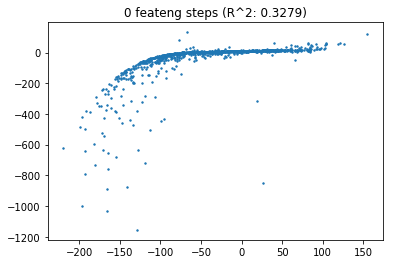

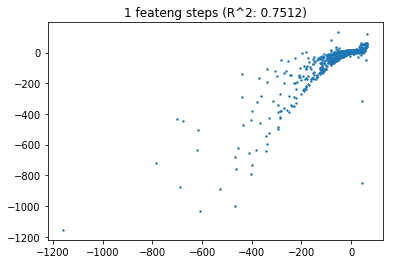

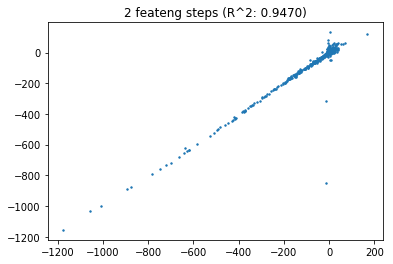

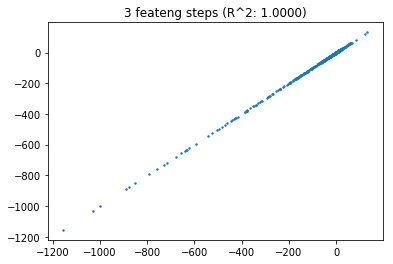

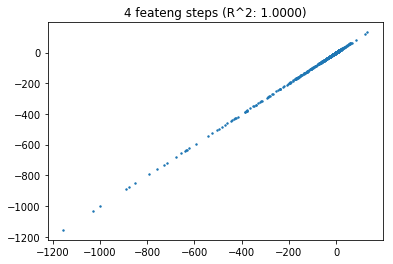

In [4]:
# autofeat with different number of feature engineering steps
# 3 are perfect
for steps in range(5):
    print("### AutoFeat with %i feateng_steps" % steps)
    afreg = AutoFeatRegression(verbose=1, feateng_steps=steps)
    df = afreg.fit_transform(df_org, target)
    r2 = afreg.score(df_org, target)
    print("## Final R^2: %.4f" % r2)
    plt.figure()
    plt.scatter(afreg.predict(df_org), target, s=2);
    plt.title("%i feateng steps (R^2: %.4f)" % (steps, r2))

### AutoFeat and noise

[AutoFeatRegression] The 3 step feature engineering process could generate up to 5271 features.
[AutoFeatRegression] With 1000 data points this new feature matrix would use about 0.02 gb of space.
[feateng] Step 1: transformation of original features
[feateng] Generated 17 transformed features from 3 original features - done.
[feateng] Step 2: first combination of features
[feateng] Generated 749 feature combinations from 190 original feature tuples - done.
[feateng] Step 3: transformation of new features
[feateng] Generated 3498 transformed features from 749 original features - done.
[feateng] Generated a total of 3694 additional features
[featsel] Scaling data...done.
[featsel] 2473/3697 features after univariate filtering
[featsel] Feature selection run 1/3
[featsel] Feature selection run 2/3
[featsel] Feature selection run 3/3
[featsel] 12 features after 3 feature selection runs
[featsel] 6 features after correlation filtering
[featsel] 4 features after noise filtering
[featsel] 5 

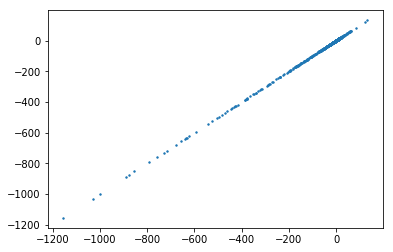

In [5]:
afreg = AutoFeatRegression(verbose=1, feateng_steps=3)
# train on noisy data
df = afreg.fit_transform(df_org, target_noisy)
# test on real targets
print("Final R^2: %.4f" % afreg.score(df, target))
plt.figure()
plt.scatter(afreg.predict(df), target, s=2);